In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None) ## For displaying all the columns
pd.set_option("display.max_rows",None) ## For displaying all the rows.

In [73]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


By looking our dataset we can drop customerID column and our target variable is churn

In [74]:
data.drop('customerID',axis=1,inplace=True)

In [6]:
### checking data size.
data.shape

(7043, 20)

In our dataset there are 7043 rows and 20 columns.

In [7]:
### checking for null values.
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value in our dataset

In [8]:
data.loc[data['TotalCharges']== " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We can see there is space in Total Charges column for 11 rows, Lets replace them with null value.

In [75]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)

In [10]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

No we can see Total Charges column has 11 null values, Lets Handle this null values  with Fillna technique.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


We can see there are multiple columns which contain catagorical data. Also our target variable is catagorical column.
also we can see TotalCharges is showing object type but it contain float type data. We will change the dtype for particular column.
 

In [76]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Now Total charges column is converted in Float type

In [77]:
### Filling null values with mean of Total charges column.
data['TotalCharges'] = data['TotalCharges'].fillna(np.mean(data['TotalCharges']))

In [78]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now there is no null values in our dataset.

In [79]:
## Checking count in Gender
data['gender'].value_counts().unique()

array([3555, 3488], dtype=int64)

There are 3555 males and 3488 are females.

##### Let's visualize our catagorical data columns.

In [80]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [81]:
data_catagoical = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']].copy()

### Exploratory Data Analysis

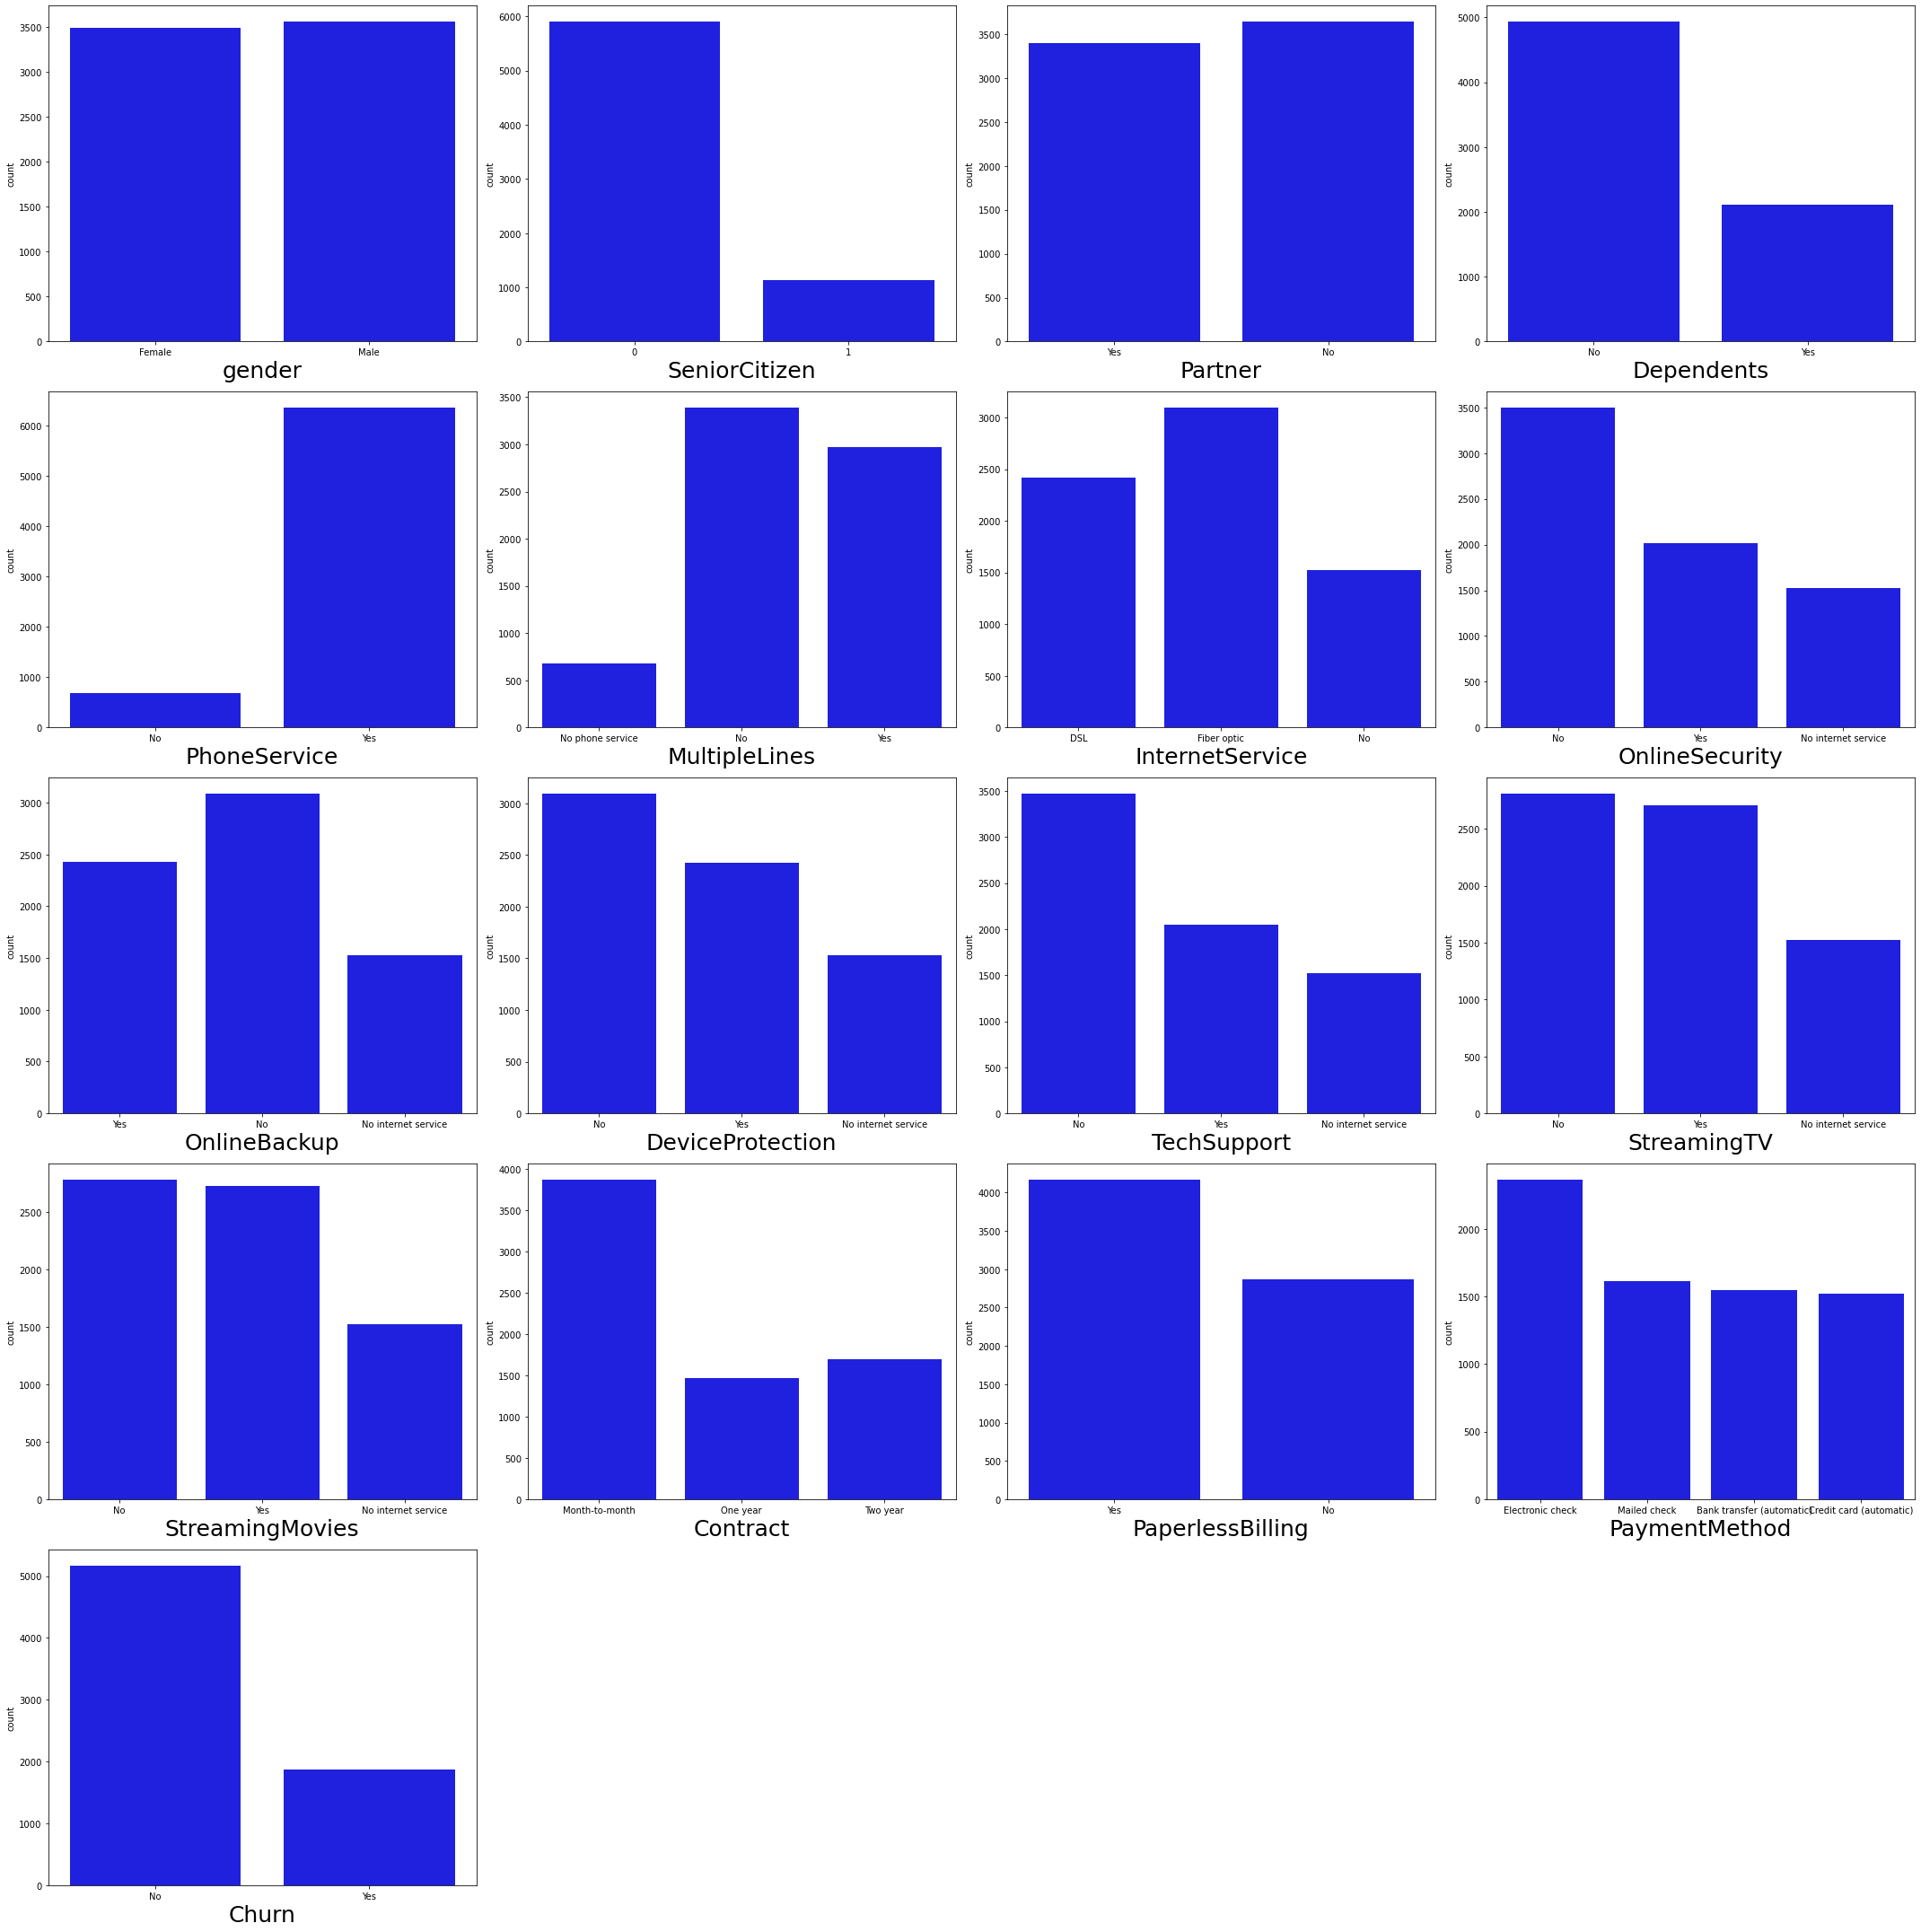

In [29]:
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

for column in data_catagoical:
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(data_catagoical[column],color='b')
        plt.xlabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

We can see there is class imbalance problem in our target variable.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

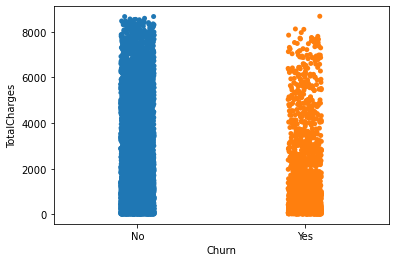

In [33]:
### Let's plot strip plot between Churn and Total charges to check relationship.
sns.stripplot(x='Churn',y= 'TotalCharges', data=data)

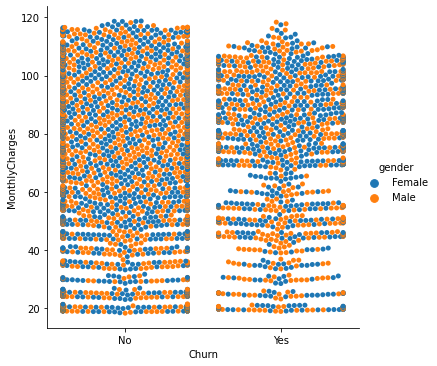

In [35]:
sns.catplot(x='Churn',y='MonthlyCharges',data=data, kind='swarm',hue='gender')

We can see if Monthly charges are less then 80, Customer are satisfied, And as the monthly charges increases above 60, Customer satisfaction is decreases resulting in Churn No. 

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

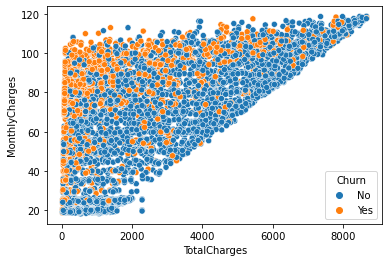

In [38]:
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=data, hue='Churn')

We can see more customers are churn when total charges are high.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

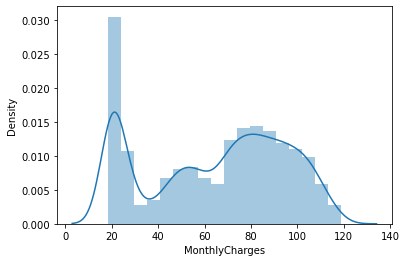

In [30]:
### Checking data distribution for MonthlyCharges data columns.
sns.distplot(data['MonthlyCharges'])

Data distribution for this columns looks slightly right skewed. we will check with the skewness value.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

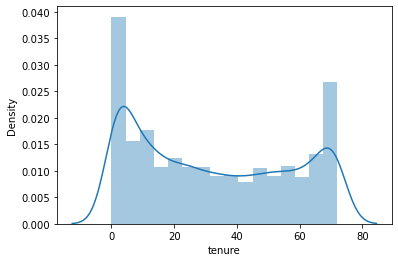

In [31]:
### Checking data distribution for tenure data columns.
sns.distplot(data['tenure'])

The data distribution for tenure column is looking normaly distributed.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

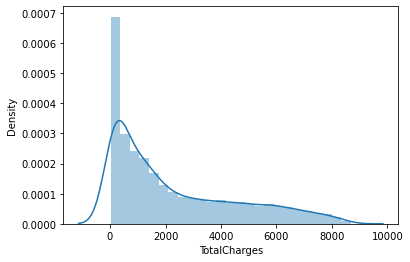

In [32]:
### Checking data distribution for tenure data columns.
sns.distplot(data['TotalCharges'])

We can see for Total charges column the data is highly right skewed.
And for Monthly charges data is slighly rigth skewed, Let's check skewness for both the columns.

In [66]:
### checking skewness.
data.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Obsarvation:
SeniorCitizen column is catagorical columns as it contain values only in 0 and 1,
Tenure skewness value is less then 0.5  which means data is normally distributed.
For monthly column as well the skewness value is -0.2 which is less then -0.5 so we can the data for Monthly columns is normally distributed.
In column TotalCharges the skewness value is 0.96 which shows that data distribution is highly right skewed.
Before removing skewness lets check with outliers.

<AxesSubplot:>

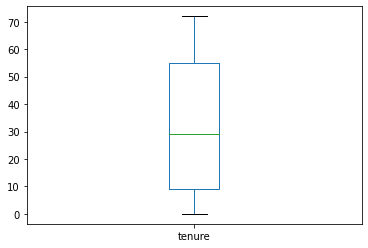

In [60]:
data['tenure'].plot(kind = 'box')

<AxesSubplot:>

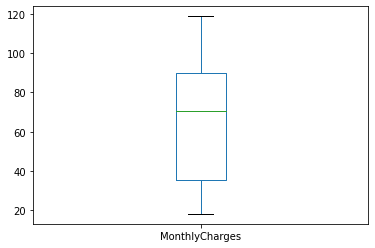

In [63]:
data['MonthlyCharges'].plot(kind = 'box')

<AxesSubplot:>

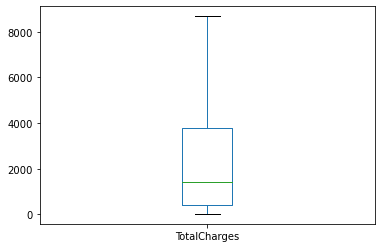

In [64]:
data['TotalCharges'].plot(kind = 'box')

As we can see there is no Outlier in our continous columns.

In [82]:
### Multivariate analysis.
##### Before multivariate analysis we have to convert our catagorical data into Numarical data. by using Encoding technique.
cols = data_catagoical.columns
from sklearn.preprocessing import LabelEncoder ### Importing label encoder to convert catagorical data in integer.
l_enc = LabelEncoder() ### Intantiating Label encoder.
data[cols] = data[cols].apply(l_enc.fit_transform) ### Fit and transforming data.

In [83]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


 We can see all the catagorical columns now converted in intiger.

<AxesSubplot:title={'center':'Correlation with Churn'}>

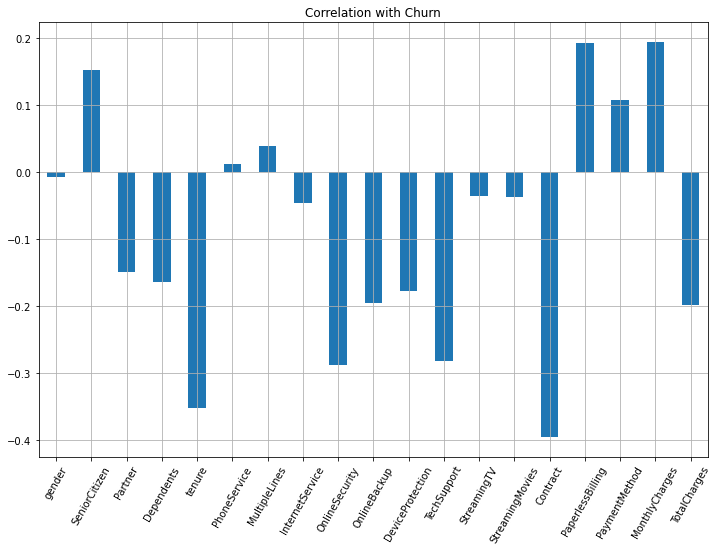

In [94]:
### let's calculate the featues Correlation values with our target variable.
data.drop('Churn',axis=1).corrwith(data.Churn).plot(kind = 'bar', grid = True, figsize=(12,8),rot = 60,title = 'Correlation with Churn')

From above garph we can see the relationship of all the features with our target variable. Contract show strong negative relationship woth Churn.
Also Tenure is showing strong negative relationship with Churn.

#### Let's sperate features and Target variable from dataset.

In [84]:
x = data.drop('Churn',axis=1)
y = data['Churn']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [96]:
### As we already checked there is class imbalance problem in our target so lets deal with that:
# Now let's deal with Class imbalance problem.
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new,y_new = sm.fit_resample(x,y)

In [100]:
print((x_new.shape),(x.shape))

(10348, 19) (7043, 19)


<AxesSubplot:xlabel='Churn', ylabel='count'>

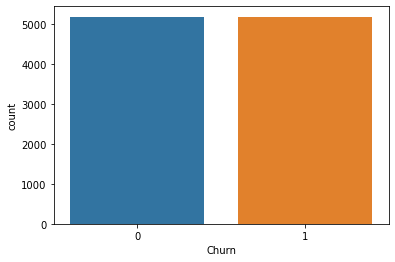

In [101]:
### Let's plot and check 
sns.countplot(y_new)

WE can see the class imbalance problem is removed  lets process with Standardization 

### Scaling (Standardization)

In [102]:
#### Now lets scale our data.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x_new)

### Train - Test Split

In [111]:
 # Now converting data into Train test split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_new,test_size=0.25,random_state=43)

In [112]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(7761, 19) (7761,) (2587, 19) (2587,)


### Finding best model

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [114]:
## Linear regression
lr = LinearRegression() ### Instantiating Linear regression.
lr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_lr_pred =lr.predict(x_test) ### Predicting x_test using Linear regression model.

## DecisionTree Regressor
dtr = DecisionTreeRegressor() ### Instantiating DecisionTree Regressor 
dtr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_dtr_pred = dtr.predict(x_test) ### Predicting x_test using DecisionTree model.

## KNeighbors Regressor
knn = KNeighborsRegressor() ### Instantiating KNeighbors Regressor
knn.fit(x_train,y_train) ### Training our model with x_train and y_train
y_knn_pred = knn.predict(x_test) ### Predicting x_test using Kneighbors model.

## SVR
svr = SVR()             ### Instantiating SVR
svr.fit(x_train,y_train) ### Training our model with x_train and y_train
y_svr_pred = svr.predict(x_test) ### Predicting x_test using SVM model.

## RandomForest Regressor
rfr = RandomForestRegressor() ### Instantiating RandomForest Regressor
rfr.fit(x_train,y_train)     ### Training our model with x_train and y_train
y_rfr_pred = rfr.predict(x_test) ### Predicting x_test using Random Forest  model.

### Evaluation Metrics and R2_score for each model

In [119]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
print('R2 score for Linear regression:- ',r2_score(y_test,y_lr_pred))
print('R2 score for Decision Tree:- ',r2_score(y_test,y_dtr_pred))
print('R2 score for KNeighbors:- ',r2_score(y_test,y_knn_pred))
print('R2 score for SVR:- ',r2_score(y_test,y_svr_pred))
print('R2 score for Random Forest:- ',r2_score(y_test,y_rfr_pred))

R2 score for Linear regression:-  0.4220288967640573
R2 score for Decision Tree:-  0.16652750798584115
R2 score for KNeighbors:-  0.4091540015540014
R2 score for SVR:-  0.48316000820693716
R2 score for Random Forest:-  0.5500176692013012


In [117]:
### Checking MSE error.

print('MSE for Linear regression:- ',mean_squared_error(y_test,y_lr_pred))
print('MSE for Decision Tree:- ',mean_squared_error(y_test,y_dtr_pred))
print('MSE for KNeighbors:- ',mean_squared_error(y_test,y_knn_pred))
print('MSE for SVR:- ',mean_squared_error(y_test,y_svr_pred))
print('MSE for Random Forest:- ',mean_squared_error(y_test,y_rfr_pred))

MSE for Linear regression:-  0.144489127093655
MSE for Decision Tree:-  0.2083628613151226
MSE for KNeighbors:-  0.14770776961731735
MSE for SVR:-  0.12920673515192344
MSE for Random Forest:-  0.11249274197386724


In [121]:
print('CV score for Linear regression = ',cross_val_score(lr,x,y,cv=5).mean())
print('CV score for KNeighborsRegressor = ',cross_val_score(knn,x,y,cv=5).mean())
print('CV score for DecisionTreeRegressor = ',cross_val_score(dtr,x,y,cv=5).mean())
print('CV score for RandomForestRegressor = ',cross_val_score(rfr,x,y,cv=5).mean())
print('CV score for SVR = ',cross_val_score(svr,x,y,cv=5).mean())

CV score for Linear regression =  0.27200788844559104
CV score for KNeighborsRegressor =  0.116512420689406
CV score for DecisionTreeRegressor =  -0.382600816325208
CV score for RandomForestRegressor =  0.24460247941564828
CV score for SVR =  -0.022096313807472612


We can see R2_score is highest for Random forest also MSE error is less for Random forest  let's choose Random forest for model building

### Performing Hyper Parameter tuning.

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
params = {'n_estimators': np.arange(100,250,25),
               'max_features': ['auto','sqrt'],
               'max_depth': np.arange(10,30,2),
               'min_samples_split': [5,7,9,11,13],
               'min_samples_leaf': [11,15,17,21]}

In [ ]:
grid_search = GridSearchCV(estimator=rfr,param_grid= params,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)